# Семинар 1 - numpy, pandas

## 1. Numpy

- документация: http://www.numpy.org/

Библиотека numpy является удобным инструментом для работы с многомерными массивами с возможностью векторизации вычислений. Рассмотрим базовые вещи, которые можно делать с помощью нее.

In [1]:
import numpy as np

In [2]:
vec = np.array([[1, 2], [3, 4], [5, 6]])
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

С чем мы работаем?

In [3]:
vec.dtype

dtype('int32')

In [4]:
type(vec)

numpy.ndarray

Размер массива и число осей:

In [5]:
vec.shape

(3, 2)

In [6]:
vec.ndim

2

У некоторых функций бывает параметр `axis`, который позволяет применить эту функцию по разным осям - в данном случае, по строкам или столбцам:

In [7]:
np.sum(vec)

21

In [8]:
np.sum(vec, axis=0)

array([ 9, 12])

In [9]:
np.sum(vec, axis=1)

array([ 3,  7, 11])

In [10]:
vec.sum()

21

Транспонируем массив:

In [11]:
vec.T

array([[1, 3, 5],
       [2, 4, 6]])

In [12]:
vec.transpose()

array([[1, 3, 5],
       [2, 4, 6]])

Обратите внимание, что переменная `vec` не поменялась!

In [13]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

Индексирование:

In [14]:
vec[:, 1]

array([2, 4, 6])

In [15]:
vec[2, :]

array([5, 6])

In [16]:
vec[1:2, 0]

array([3])

In [17]:
vec[::2, :]

array([[1, 2],
       [5, 6]])

In [18]:
vec[vec % 2 == 0]

array([2, 4, 6])

Иногда бывает полезно создавать специфичные массивы:

In [19]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [21]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

И, наконец - арифметические операции!

In [22]:
vec + 1

array([[2, 3],
       [4, 5],
       [6, 7]])

In [23]:
vec * 2

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [24]:
vec ** 2

array([[ 1,  4],
       [ 9, 16],
       [25, 36]], dtype=int32)

In [25]:
vec + vec ** 2

array([[ 2,  6],
       [12, 20],
       [30, 42]])

In [26]:
vec * vec ** 2

array([[  1,   8],
       [ 27,  64],
       [125, 216]])

In [27]:
np.sin(vec)

array([[ 0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ]])

**Задание 1.** Напишите функцию `matrix_mult` (не используя `np.dot` или `np.matmul`)
$$
[AB]_{ij} = \sum\limits_{k}A_{ik} B_{kj}
$$

In [49]:
def matrix_mult(A,B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            C[i, j] = np.sum(A[i, :]*B[:, j])
    return C

In [50]:
# Test
A = np.array(range(10)).reshape(2,5)
B = np.array(range(10)).reshape(5,2)
assert (matrix_mult(A, B) == np.dot(A, B)).all()

In [39]:
A @ B == np.dot(A, B)

array([[ True,  True],
       [ True,  True]])

**Задание 2.** Напишите функцию `negative_maker`, которая принимает на вход 2 числа `a`, `b` и массив `X` и умножает все элементы `X` котрые лежат в интервале `[a, b]` на `-1`

In [40]:
def negative_maker(X, a, b):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if (X[i, j] >= a) and (X[i, j] <= b):
                X[i, j] = -1 * X[i, j]
    return X

In [44]:
def negative_maker(X, a, b):
    ind = (X >= a) & (X <= b)
    print(ind)
    X[ind] *= -1
    return X

In [45]:
# test
test = np.array(range(9)).reshape(3,3)
assert negative_maker(test, -1, 3).all() == np.array([[ 0, -1, -2], [-3,  4,  5], [ 6,  7,  8]]).all()

[[ True  True  True]
 [ True False False]
 [False False False]]


Почему вообще используют `numpy`?

In [51]:
%%time
C = matrix_mult(A, B)

Wall time: 0 ns


In [52]:
%%time
C = A @ B

Wall time: 0 ns


### Задания для самостоятельного решения

1. Развернуть одномерный массив (сделать так, чтобы его элементы шли в обратном порядке).
2. Найти максимальный нечетный элемент в массиве.
3. Замените все нечетные элементы массива на ваше любимое число.
4. Создайте массив первых n нечетных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`. *Функции, которые могут пригодиться при решении: `.arange()`*
5. Вычислите самое близкое и самое дальнее числа к данному в рассматриваемом массиве чисел. Например, если на вход поступают массив `array([0, 1, 2, 3, 4])` и число 1.33, то ответом будет `(1, 4)`. _Функции, которые могут пригодиться при решении: `.abs()`, `.argmax()`, `.argmin()`_
6. Вычисляющую первообразную заданного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$. _Функции, которые могут пригодиться при решении: `.append()`_
7. Пользуясь пунктом 6, посчитайте первую производную для заданного полинома в заданной точке.

## 2. Pandas
![alt text](https://media0.giphy.com/media/fAaBpMgGuyf96/giphy.gif)

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле ["math_students.csv"](https://drive.google.com/file/d/1RuzDsF8YKCDMVmpkBfjudHd9JALUp3yc/view?usp=sharing). 

 Целевой переменной является итоговая оценка студента за курс.

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# магическая функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

In [54]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

 ---

 Для вывода названий всех признаков есть специальная функция:

In [55]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

 Как обращаться к колонкам?
* "dot" `data.G3` 
* "brackets" `data['G3']`. 
* "list in the bracket" `data['G3', 'G2']` 
* "index" `data.iloc[:, -1]`


In [57]:
data.G3

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [58]:
data['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [59]:
data[['G3']]

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


In [60]:
data.iloc[:, -1]

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

**Задание 1**  Отделить от признаков целевую переменную. Создать вектор `y` и таблицу `X`

In [61]:
data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [ ]:
# YOUR CODE HERE
X = data[data.columns[:-1]]
y = data.G3

А теперь тоже самое, используя функцию `drop`:

```data.drop([col_1, col_2], axis=1)```

In [ ]:
# YOUR CODE HERE

Посмотрим, есть ли в данных пропуски:

In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

По любой функции можно получить информацию из документации следующим образом:

In [ ]:
?pd.isna()

Можно вывести статистику по значениям признаков:

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Задание 2**  Прочитайте документацию и выведите статистику по значениям **всех** признаков

In [ ]:
?data.describe 

In [ ]:
# YOUR CODE HERE

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


Какие значения принимает признак `guardian`?

In [ ]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [ ]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Чтобы получить все строки, которые удовлетворяют условию 

```table[condition]```

In [ ]:
data[data.guardian == 'mother'].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11



Чтобы комбинировать условия:

* `&` --- and
* `|` --- or
* `~` --- not

In [ ]:
data[(data.guardian == 'mother') | (data.guardian == 'father')].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**Задание 3**  
1. Выделим студентов младще 16 лет у которых опекуном является не мать

In [ ]:
# your code here

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
11,GP,F,15,U,GT3,T,2,1,services,other,reputation,father,3,3,0,no,yes,no,yes,yes,yes,yes,no,5,2,2,1,1,4,4,10,12,12
12,GP,M,15,U,LE3,T,4,4,health,services,course,father,1,1,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,1,3,5,2,14,14,14
14,GP,M,15,U,GT3,A,2,2,other,other,home,other,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,5,2,1,1,3,0,14,16,16
21,GP,M,15,U,GT3,T,4,4,health,health,other,father,1,1,0,no,yes,yes,no,yes,yes,yes,no,5,4,2,1,1,5,0,12,15,15
35,GP,F,15,U,GT3,T,2,3,other,other,other,father,2,1,0,no,yes,no,yes,yes,yes,no,no,3,5,1,1,1,5,0,8,7,6


2. Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [ ]:
# your code here

Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

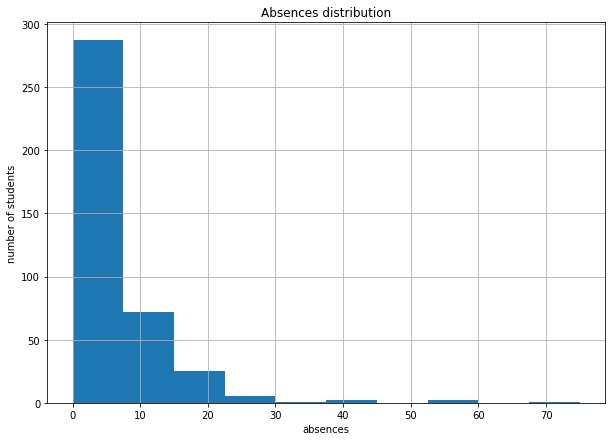

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Absences distribution')

data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

Мы можем считать разные статистки

In [ ]:
data['absences'].mean()

5.708860759493671

In [ ]:
data['absences'].std()

8.003095687108177

In [ ]:
data['absences'].max()

75

**Задание 4** 
разделим студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно **не** меньше среднего.

In [ ]:
mean_absences = data['absences'].mean()
# your code here

**Задание 5**  Посчитаем среднее значение целевой переменной для каждой части.

In [ ]:
# your code here

Students with few absences, mean G3: 10.168674698795181
Students with many absences, mean G3: 10.835616438356164


Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже. Возможно, студенты, пропускавшие много занятий, знали материал очень хорошо :)

Также данные можно исследовать с помощью диаграмма рассеивания (scatter plot)

<Figure size 720x504 with 0 Axes>

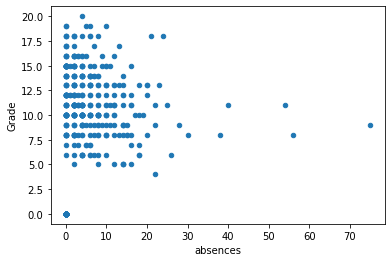

In [ ]:
plt.figure(figsize=(10,7))

data.plot.scatter(x = 'absences', y='G3')
plt.xlabel('absences')
plt.ylabel('Grade')
plt.show()